### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
import matplotlib.pyplot as plt

# Lista de DataFrames para análisis
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#1. Análisis de facturación



In [9]:
ingresos_totales = []

for t in tiendas:
    ingreso = t['Precio'].sum()
    ingresos_totales.append(ingreso)

for nombre, ingreso in zip(nombres_tiendas, ingresos_totales):
    print(f"{nombre}: ${ingreso:,.2f}")


Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


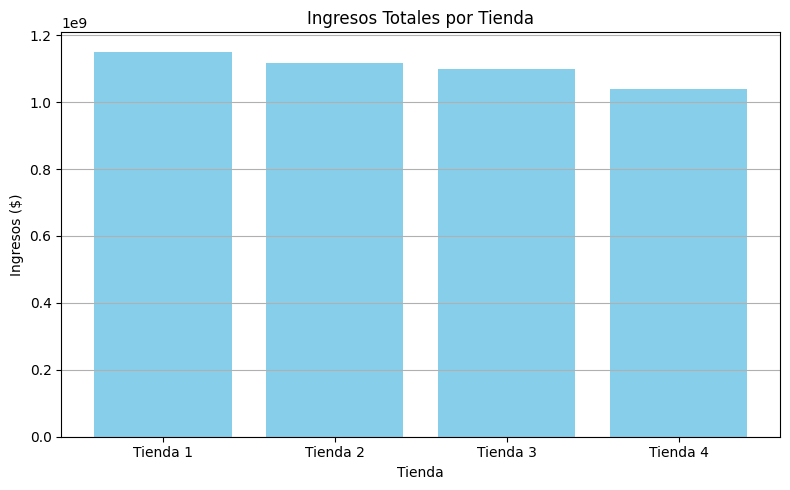

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos_totales, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [10]:
for nombre, t in zip(nombres_tiendas, tiendas):
    print(f"\nCategorías más vendidas en {nombre}:")
    categorias = t['Categoría del Producto'].value_counts()
    print(categorias)


Categorías más vendidas en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Categorías más vendidas en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Categorías más vendidas en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: i

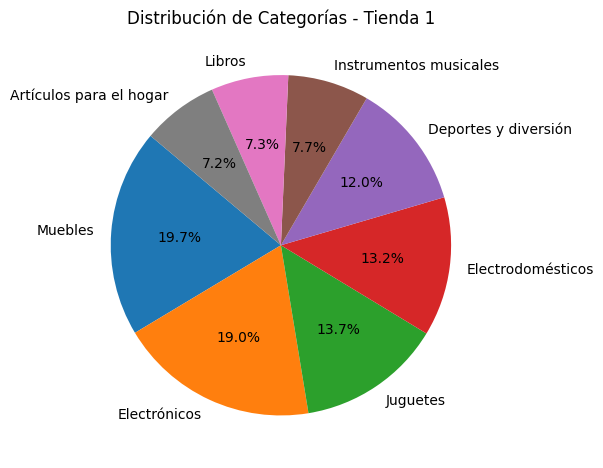

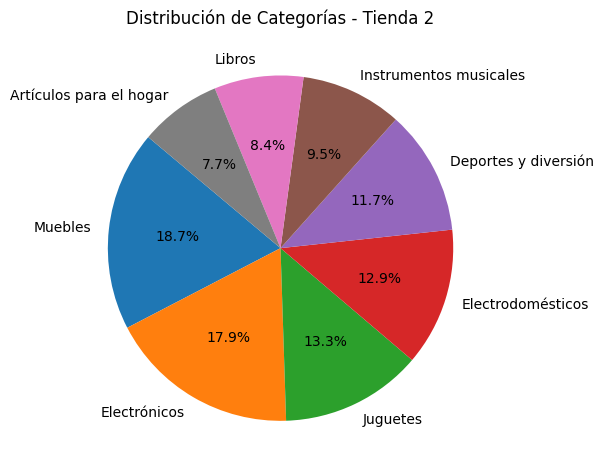

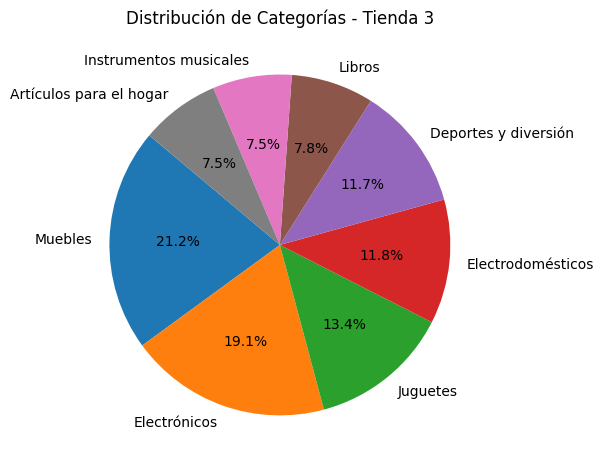

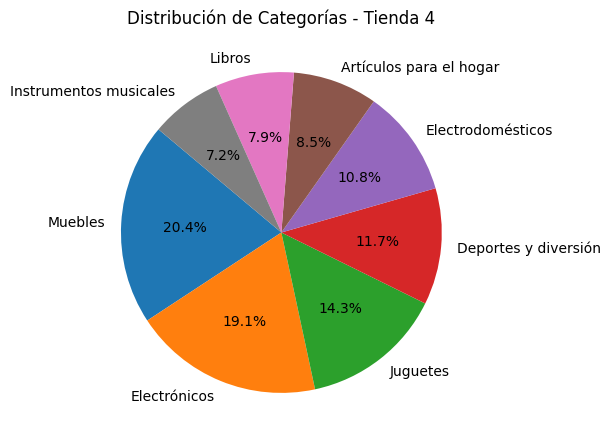

In [16]:
for nombre, t in zip(nombres_tiendas, tiendas):
    categorias = t['Categoría del Producto'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Categorías - {nombre}')
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [11]:
calificaciones_promedio = []

for t in tiendas:
    promedio = t['Calificación'].mean()
    calificaciones_promedio.append(promedio)

for nombre, calif in zip(nombres_tiendas, calificaciones_promedio):
    print(f"{nombre} - Calificación promedio: {calif:.2f}")

Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


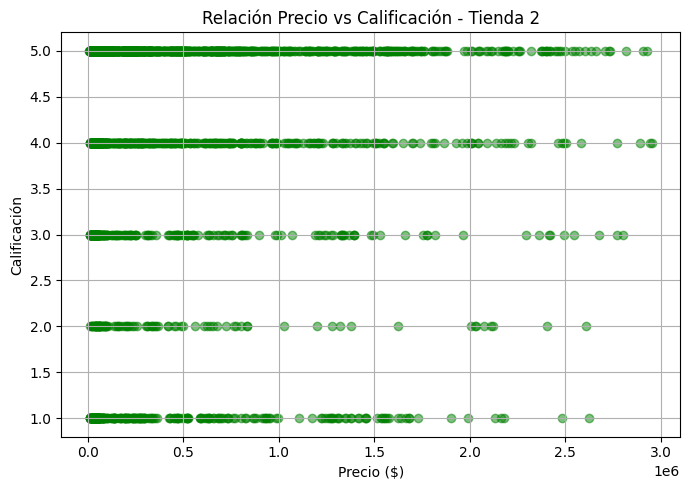

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(tienda2['Precio'], tienda2['Calificación'], alpha=0.5, color='green')
plt.title('Relación Precio vs Calificación - Tienda 2')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [12]:
for nombre, t in zip(nombres_tiendas, tiendas):
    print(f"\nAnálisis de ventas por producto en {nombre}:")
    conteo = t['Producto'].value_counts()
    print("Más vendido:", conteo.idxmax(), "-", conteo.max(), "ventas")
    print("Menos vendido:", conteo.idxmin(), "-", conteo.min(), "ventas")


Análisis de ventas por producto en Tienda 1:
Más vendido: Microondas - 60 ventas
Menos vendido: Auriculares con micrófono - 33 ventas

Análisis de ventas por producto en Tienda 2:
Más vendido: Iniciando en programación - 65 ventas
Menos vendido: Juego de mesa - 32 ventas

Análisis de ventas por producto en Tienda 3:
Más vendido: Kit de bancas - 57 ventas
Menos vendido: Bloques de construcción - 35 ventas

Análisis de ventas por producto en Tienda 4:
Más vendido: Cama box - 62 ventas
Menos vendido: Guitarra eléctrica - 33 ventas


# 5. Envío promedio por tienda

In [13]:
costos_envio_promedio = []

for t in tiendas:
    costo = t['Costo de envío'].mean()
    costos_envio_promedio.append(costo)

for nombre, costo in zip(nombres_tiendas, costos_envio_promedio):
    print(f"{nombre} - Costo de envío promedio: ${costo:.2f}")

Tienda 1 - Costo de envío promedio: $26018.61
Tienda 2 - Costo de envío promedio: $25216.24
Tienda 3 - Costo de envío promedio: $24805.68
Tienda 4 - Costo de envío promedio: $23459.46


INFORME FINAL

Durante este desafío, ayudamos al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizamos datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

RESULTADOS OBTENIDOS

Estos son los resultados obtenidos después de aplicar el análisis con Python:
1. Análisis de facturación

Tienda 1: $1,150,880,400.00

Tienda 2: $1,116,343,500.00

Tienda 3: $1,098,019,600.00

Tienda 4: $1,038,375,700.00

**La tienda 1 es la que factura más mientras que la tienda 4 es la que tiene menor facturación.**

2. Ventas por categoría

Categorías más vendidas en Tienda 1:

Categoría del Producto

Muebles                    465

Electrónicos               448

Juguetes                   324

Electrodomésticos          312

Deportes y diversión       284

Instrumentos musicales     182

Libros                     173

Artículos para el hogar    171


Categorías más vendidas en Tienda 2:

Categoría del Producto

Muebles                    442

Electrónicos               422

Juguetes                   313

Electrodomésticos          305

Deportes y diversión       275

Instrumentos musicales     224

Libros                     197

Artículos para el hogar    181


Categorías más vendidas en Tienda 3:

Categoría del Producto

Muebles                    499

Electrónicos               451

Juguetes                   315

Electrodomésticos          278

Deportes y diversión       277

Libros                     185

Instrumentos musicales     177

Artículos para el hogar    177


Categorías más vendidas en Tienda 4:

Categoría del Producto

Muebles                    480

Electrónicos               451

Juguetes                   338

Deportes y diversión       277

Electrodomésticos          254

Artículos para el hogar    201

Libros                     187

Instrumentos musicales     170


**La categoría de productos con más ventas es "Muebles", seguido por "Electrónicos" y "Juguetes" en prácticamente todas las tiendas.**

**Por otro lado, las categorías con menos ventas varían ligeramente de tienda a tienda siendo "Artículos para el hogar" la categoría que menos vende en general**


3. Calificación promedio de la tienda

Tienda 1 - Calificación promedio: 3.98

Tienda 2 - Calificación promedio: 4.04

Tienda 3 - Calificación promedio: 4.05

Tienda 4 - Calificación promedio: 4.00

**La tienda mejor calificada es la 3 con 4.05 y la peor calificada es la 1 con 3.98.**


4. Productos más y menos vendidos

Análisis de ventas por producto en Tienda 1:

Más vendido: Microondas - 60 ventas

Menos vendido: Auriculares con micrófono - 33 ventas


Análisis de ventas por producto en Tienda 2:

Más vendido: Iniciando en programación - 65 ventas

Menos vendido: Juego de mesa - 32 ventas


Análisis de ventas por producto en Tienda 3:

Más vendido: Kit de bancas - 57 ventas

Menos vendido: Bloques de construcción - 35 ventas


Análisis de ventas por producto en Tienda 4:

Más vendido: Cama box - 62 ventas

Menos vendido: Guitarra eléctrica - 33 ventas

**La tienda 2 lidera con 65 ventas de su producto estrella. La tienda 3 es la que tiene menor cantidad de ventas de su mejor producto. Además, en esta tienda su rango entre los productos con mayores y menores ventas es menor.**


5. Envío promedio por tienda

Tienda 1 - Costo de envío promedio: $26018.61

Tienda 2 - Costo de envío promedio: $25216.24

Tienda 3 - Costo de envío promedio: $24805.68

Tienda 4 - Costo de envío promedio: $23459.46

**La tienda 4 tiene el menor costo de envío promedio**

CONCLUSIÓN

La tienda 4 es la que el Sr. Juan debería vender ya que es la tienda con menor facturación, tiene una calificación promedio aceptable de (4.00) sin ser la mejor de las 4 y su producto más vendido no supera al producto más vendido de la tienda 2. Aunque tiene la ventaja de tener el menor costo de envío promedio, los demás factores considerados tienen más peso.